In [110]:
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
#Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [111]:
df = pd.read_csv("measurements.csv")

In [112]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [113]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB
None


In [114]:
# df = df.drop(['specials'], axis=1)
# df = df.drop(['refill liters'], axis=1)
# df = df.drop(['refill gas'], axis=1)

In [115]:
print(df.describe().T)

              count       mean        std   min    25%   50%   75%   max
speed         388.0  41.927835  13.598524  14.0  32.75  40.5  50.0  90.0
temp_outside  388.0  11.358247   6.991542  -5.0   7.00  10.0  16.0  31.0
AC            388.0   0.077320   0.267443   0.0   0.00   0.0   0.0   1.0
rain          388.0   0.123711   0.329677   0.0   0.00   0.0   0.0   1.0
sun           388.0   0.082474   0.275441   0.0   0.00   0.0   0.0   1.0


In [116]:
#Type Conversion for Numerical Data
df['distance'] = df['distance'].str.replace(',','.').astype('float32')
df['consume'] = df['consume'].str.replace(',','.').astype('float32')
df['temp_inside'] = df['temp_inside'].str.replace(',','.').astype('float32')
df['refill liters'] = df['refill liters'].str.replace(',','.').astype('float32')
df['specials'] = df['specials'].str.lower()

In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float32
 1   consume        388 non-null    float32
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float32
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float32
 11  refill gas     13 non-null     object 
dtypes: float32(4), int64(5), object(3)
memory usage: 30.4+ KB
None


In [118]:
print(df.isna().sum())

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


In [119]:
df['specials'] = df['specials'].fillna('others')
df['refill liters'] = df['refill liters'].fillna(0)
df['refill gas'] = df['refill gas'].fillna('norefill')

df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].mean())

In [120]:
print(df.isna().sum())

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64


In [121]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,others,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,others,E10,0,0,0,0.0,norefill
2,11.2,5.5,38,21.5,15,others,E10,0,0,0,0.0,norefill
3,12.9,3.9,36,21.5,14,others,E10,0,0,0,0.0,norefill
4,18.5,4.5,46,21.5,15,others,E10,0,0,0,0.0,norefill
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,others,SP98,0,0,0,0.0,norefill
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0,0.0,norefill
385,16.0,3.8,45,25.0,19,others,SP98,0,0,0,0.0,norefill
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0,0.0,norefill


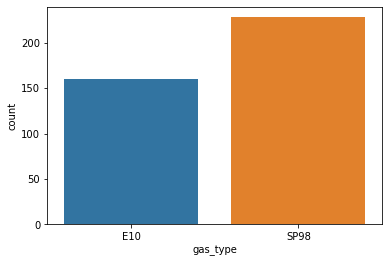

In [122]:
sns.countplot(data = df, x = "gas_type")
plt.show()

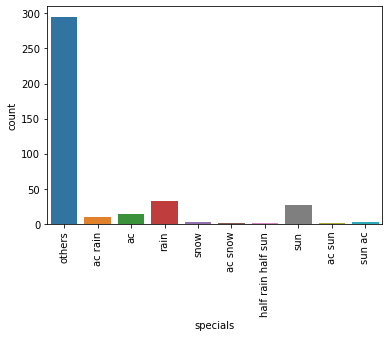

In [123]:
sns.countplot(data = df, x = "specials")
plt.xticks(rotation=90)
plt.show()

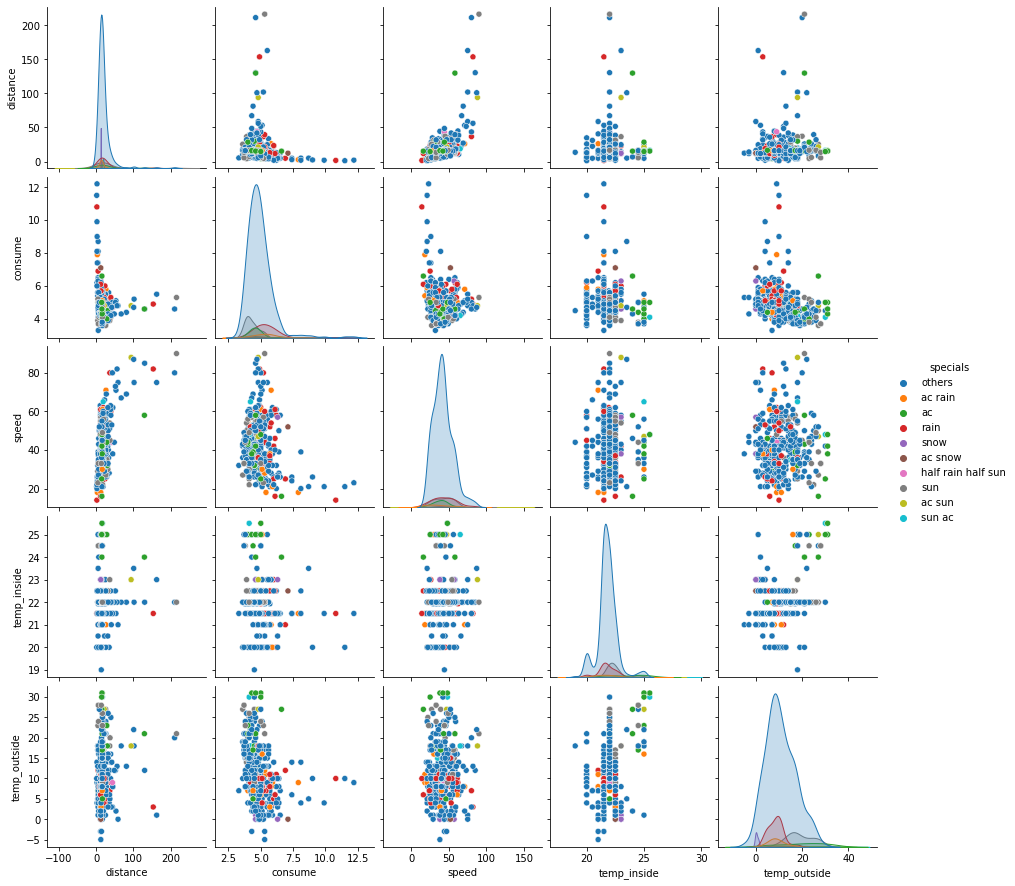

In [124]:
sns.pairplot(data = df[["distance", "consume", "speed", "temp_inside", "temp_outside", "specials"]], hue="specials")
plt.show()